In [1]:
import pandas as pd
import numpy as np


from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords  #pip install nltk
from nltk.stem.porter import PorterStemmer
import string

from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from gensim.models import word2vec  #pip install word2vec

#from wordcloud import WordCloud  #pip install wordcloud

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import re
from sklearn.manifold import TSNE, MDS

from textblob import TextBlob  #Sentiment Analysis - pip install textblob
from sklearn.decomposition import TruncatedSVD

C:\Users\shkhan2\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [62]:
df_papers = pd.read_csv('data/papers.csv')
print(df_papers.shape)
df_papers.head()

(7241, 7)


,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [3]:
# Make everything lower case
df_papers.loc[:,'title'] = df_papers.title.apply(lambda x : x.lower())

#Remove non letters and numbers stuff
regex = re.compile(r'\W+')
df_papers.loc[:,'title'] = df_papers.title.apply(lambda x: regex.sub(' ', x))

In [4]:
df_papers.loc[:,'title'] = df_papers['title'].apply(lambda x: x.split(' '))

In [5]:
#Remove stop words and stem
porter = PorterStemmer()
stops = set(stopwords.words("english"))
stops = stops.union(set("year"))
df_papers.loc[:,'title'] = df_papers['title'].apply(lambda x: [word for word in x if word not in stops])


In [6]:
df_papers.head(100)

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,"[self, organization, associative, database, ap...",NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,"[mean, field, theory, layer, iv, visual, corte...",NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,"[storing, covariance, associative, long, term,...",NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,"[bayesian, query, construction, neural, networ...",NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"[neural, network, ensembles, cross, validation...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."
5,1002,1994,"[using, neural, net, instantiate, deformable, ...",NaN,1002-using-a-neural-net-to-instantiate-a-defor...,Abstract Missing,U sing a neural net to instantiate a\ndeformab...
6,1003,1994,"[plasticity, mediated, competitive, learning]",NaN,1003-plasticity-mediated-competitive-learning.pdf,Abstract Missing,Plasticity-Mediated Competitive Learning\n\nTe...
7,1004,1994,"[iceg, morphology, classification, using, anal...",NaN,1004-iceg-morphology-classification-using-an-a...,Abstract Missing,ICEG Morphology Classification using an\nAnalo...
8,1005,1994,"[real, time, control, tokamak, plasma, using, ...",NaN,1005-real-time-control-of-a-tokamak-plasma-usi...,Abstract Missing,Real-Time Control of a Tokamak Plasma\nUsing N...
9,1006,1994,"[pulsestream, synapses, non, volatile, analogu...",NaN,1006-pulsestream-synapses-with-non-volatile-an...,Abstract Missing,Real-Time Control of a Tokamak Plasma\nUsing N...


In [7]:
def build_corpus(data): 
    corpus = []
    for index, titles in data['title'].iteritems():
        corpus.append(" ".join(titles))
    return corpus

corpus = build_corpus(df_papers)
print(corpus)

['self organization associative database applications', 'mean field theory layer iv visual cortex application artificial neural networks', 'storing covariance associative long term potentiation depression synaptic strengths hippocampus', 'bayesian query construction neural network models', 'neural network ensembles cross validation active learning', 'using neural net instantiate deformable model', 'plasticity mediated competitive learning', 'iceg morphology classification using analogue vlsi neural network', 'real time control tokamak plasma using neural networks', 'pulsestream synapses non volatile analogue amorphous silicon memories', 'learning play game chess', 'multidimensional scaling data clustering', 'experimental comparison recurrent neural networks', 'training multilayer perceptrons extended kalman algorithm', 'interference learning internal models inverse dynamics humans', 'active learning statistical models', 'rapid graph based method arbitrary transformation invariant patte

In [8]:
vectorizer = TfidfVectorizer(ngram_range=(2,2))
X = vectorizer.fit_transform(corpus)
print(X.get_shape())
print((vectorizer.get_feature_names()))
#print(X.has_sorted_indices)

feature_array = np.array(vectorizer.get_feature_names())
tfidf_sorting = np.argsort(X.toarray()).flatten()[::-1]




(7241, 26853)
['000 neuron', '17 parameters', '1993 nips', '1d minimax', '2003 feature', '25 examples', '2d 3d', '2d motion', '2d observers', '2d parsing', '2d views', '2d visual', '2k theory', '32k connections', '360 imagery', '3d biomedical', '3d convolutional', '3d correspondence', '3d cuboid', '3d cuboids', '3d data', '3d electronic', '3d estimation', '3d generative', '3d human', '3d motor', '3d object', '3d objects', '3d point', '3d pose', '3d reconstruction', '3d rigid', '3d shape', '3d social', '3d structure', '3d supervision', '3d view', '3d visual', '3n2 weights', '40 hz', '488 solutions', '5d sketches', '_1 minimization', '_2 kernel', '_rate finite', 'abandoned mines', 'abilities cascade', 'abilities using', 'ability line', 'ability online', 'absence cycles', 'absolute discounting', 'absolute shrinkage', 'absorbing random', 'abstention based', 'abstract actions', 'abstract decision', 'abstract planning', 'abstract senses', 'abstraction complex', 'abstraction hierarchies', 'ab

In [9]:
df_tfidf = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
print(df_tfidf.shape)
df_tfidf['year'] = df_papers['year']
print(df_tfidf.shape)


df_tfidf.head()



(7241, 26853)
(7241, 26854)


,000 neuron,17 parameters,1993 nips,1d minimax,2003 feature,25 examples,2d 3d,2d motion,2d observers,2d parsing,...,zero shot,zero sum,zero temperature,zeroth order,zeta function,zeta hull,zig zag,zip code,zype error,year
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1987
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1987
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1988
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1994
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1994


In [10]:
df_tfidf_year = df_tfidf.groupby(['year']).mean()
df_tfidf_year.head()


,000 neuron,17 parameters,1993 nips,1d minimax,2003 feature,25 examples,2d 3d,2d motion,2d observers,2d parsing,...,zero order,zero shot,zero sum,zero temperature,zeroth order,zeta function,zeta hull,zig zag,zip code,zype error
year,,,,,,,,,,,,,,,,,,,,,
1987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1988,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004294,0.0
1989,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1991,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [58]:
top_n = 10
min_year = 2017
max_year = 2017

df_tfidf_year_T = df_tfidf_year.T
years = df_tfidf_year_T.columns
topics  = set()
for year in years:
        if (year >= min_year) & (year <=max_year):
            tfidf_sorted = df_tfidf_year_T.sort_values(by=[year], ascending=False)
            #tfidf_sorted.head(20)
            topics = topics.union(set(tfidf_sorted.index[:top_n]))

print(len(topics))
#tfidf_sorted_ind['neural', :]
#tfidf_sorted.columns
remove_set = set(["using", "based", "via", "semi", "online", "large", "multi", "analysis", "data", "stochastic"])
topics = topics.difference(remove_set)
#Comment line below, just experimenting
#topics = set(["neural network", "metric learning", "monte carlo"])

10


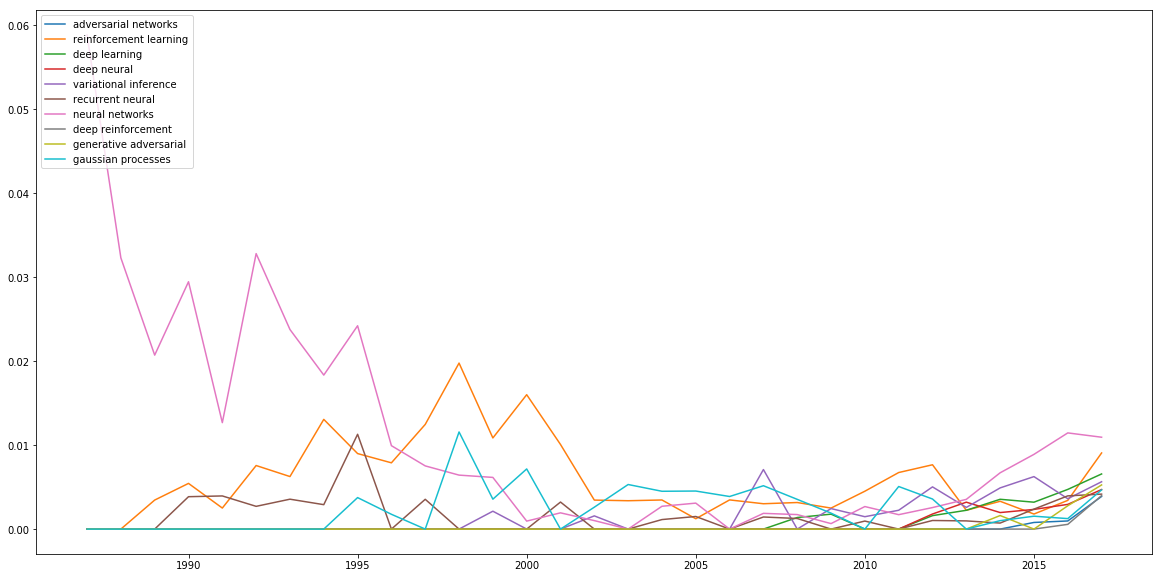

In [59]:
plt.figure(figsize=(20,10))
for topic in topics:
    plt.plot(tfidf_sorted.columns, tfidf_sorted.loc[topic,:])
plt.legend(loc = 'upper left')